In [1]:
import tensorflow as tf
import numpy as np

In [2]:
data_money = 'test_lable/'

In [3]:
IMG_SH_money = (224, 224)
TRAINING_DATA_DIR_money = str(data_money)
datagen_kwargs_money = dict(rescale=1./255, validation_split=.01)
valid_datagen_money = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs_money)
valid_generator_money = valid_datagen_money.flow_from_directory(
TRAINING_DATA_DIR_money,subset="validation",shuffle=True,target_size=IMG_SH_money)

Found 0 images belonging to 12 classes.


In [4]:
train_datagen_money = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs_money)
train_generator_money = train_datagen_money.flow_from_directory(
TRAINING_DATA_DIR_money,
subset="training",
shuffle=True,
target_size=IMG_SH_money)

Found 0 images belonging to 12 classes.


In [5]:
image_batch_train, label_batch_train = next(iter(train_generator_money))
dataset_labels_money = sorted(train_generator_money.class_indices.items(), key=lambda pair:pair[1])
dataset_labels_money = np.array([key.title() for key, value in dataset_labels_money])


In [6]:
model_money = tf.keras.models.load_model('my_model_money')

In [7]:
#Dynamic Presection

In [9]:
import cv2
cap_money = cv2.VideoCapture(0)
retval_money, frame_money = cap_money.read()
if retval_money != True:
    raise ValueError("Can't read frame")
cv2.imwrite('img_money.png', frame_money)
cv2.imshow("img_money.png", frame_money)
cv2.waitKey()

13

500 Eur


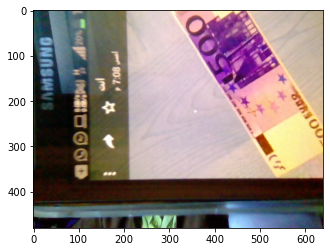

In [10]:
import cv2
import matplotlib.pyplot as plt
i = 1
while i < 600:
    import cv2
    img_money = frame_money
    imgplot = plt.imshow(img_money)
    img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
    img_money=img_money/255  # normalizing the image
    img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
    Prob_money=model_money.predict(img_money) # prediction
    indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
    print(dataset_labels_money[indd_money])
    i += 1
    break


In [11]:
res_cam = str(dataset_labels_money[indd_money])
res_cam

'500 Eur'

In [12]:
import mysql.connector
mydb = mysql.connector.connect(
host = "localhost",
user = "root",
password = "",
database = "money_discovery_db"
)
mycursor = mydb.cursor()

In [13]:
mycursor

In [14]:
sql_money = "INSERT INTO test_al (test_result, test_date) VALUES (%s, %s)"
val_money = (res_cam,'now()')
mycursor.execute(sql_money, val_money)
mydb.commit()
print(mycursor.rowcount, "record inserted.")

1 record inserted.
